# Create Imaging Templates with QuickSip

To create templates for imaging quantities, we first combine the ccd annotated files. Then, we run _QuickSip_ (Boris Lesitedt). The QuickSip code is designed for the Dark Energy Survey (DES). Therefore, we use the modified version by Marc Manera, Ashley Ross, Hee-Jong Seo et al.

In [1]:
import os
from glob import glob
from qsdriver import make_maps, combine_ccds, combine_fits

## 1. Combine CCD files

In [2]:
#--- inputs 
name = 'dr9pub' # don't use an underline "_"
nside = 256
bands = ['r', 'g', 'z']

in_dir = '/home/mehdi/data/templates/ccds/dr9/'
out_dir = '/home/mehdi/data/templates/dr9/'
out_name = 'ccds-annotated-combined-dr9-test.fits'
output_ccd = os.path.join(out_dir, out_name)

ccds = glob(f'{in_dir}ccds-annotated-*-cut.fits')
ccds

['/home/mehdi/data/templates/ccds/dr9/ccds-annotated-90prime-dr9-cut.fits',
 '/home/mehdi/data/templates/ccds/dr9/ccds-annotated-decam-dr9-cut.fits',
 '/home/mehdi/data/templates/ccds/dr9/ccds-annotated-mosaic-dr9-cut.fits']

In [3]:
combine_ccds(ccds, output_ccd)

working on .... ccds-annotated-90prime-dr9-cut.fits
number of ccds in this file: 146268
different dtypes (before): []
different dtypes (after): []
working on .... ccds-annotated-decam-dr9-cut.fits
number of ccds in this file: 5824141
different dtypes (before): ['<U7']
different dtypes (after): []
working on .... ccds-annotated-mosaic-dr9-cut.fits
number of ccds in this file: 240780
different dtypes (before): ['<U7']
different dtypes (after): []
Total number of combined ccds : 6211189
wrote the combined ccd file: /home/mehdi/data/templates/dr9/ccds-annotated-combined-dr9-test.fits


## 2. Run QuickSip

In [4]:
input_ccd = output_ccd
make_maps(input_ccd, nside, bands, name, out_dir)

> Projection nobs  mean  took : 17.41 sec for 411047 pixels
Creating and writing /home/mehdi/data/templates/dr9//dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_nobs__mean.fits
> Projection airmass  mean  took : 24.52 sec for 411047 pixels
Creating and writing /home/mehdi/data/templates/dr9//dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_airmass__mean.fits
> Projection mjd_obs  min  took : 17.16 sec for 411047 pixels
Creating and writing /home/mehdi/data/templates/dr9//dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_mjd_obs__min.fits
> Projection mjd_obs  mean  took : 19.75 sec for 411047 pixels
Creating and writing /home/mehdi/data/templates/dr9//dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_mjd_obs__mean.fits
> Projection mjd_obs  max  took : 17.49 sec for 411047 pixels
Creating and writing /home/mehdi/data/templates/dr9//dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_mjd_obs__max.fits
> Projection nobs  mean  took : 19.94 se

## 3. Combine QuickSip outputs into a hdf5 file (Pandas Dataframe)

In [2]:
#--- inputs 
name = 'dr9pub' # don't use an underline "_"
nside = 256
in_dir = '/home/mehdi/data/templates/dr9/'
out_path = f'/home/mehdi/data/templates/dr9/dr9pub_nside{nside}.h5'

inputs = os.path.join(in_dir, name, f'nside{nside}_oversamp1', f'{name}*.fits.gz')
input_maps = glob(inputs)

input_maps

['/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_nobs__mean.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_airmass__mean.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_mjd_obs__min.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_mjd_obs__mean.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_r_nside256_oversamp1_mjd_obs__max.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_g_nside256_oversamp1_nobs__mean.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_g_nside256_oversamp1_airmass__mean.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_g_nside256_oversamp1_mjd_obs__min.fits.gz',
 '/home/mehdi/data/templates/dr9/dr9pub/nside256_oversamp1/dr9pub_band_g_nside256

In [3]:
df = combine_fits(input_maps, 256, write_to=out_path)

...............

In [6]:
df.shape # (12*256*256=786,432, # of maps)

(786432, 15)

In [7]:
df.dropna().head() # index represent HEALPix index in ring ordering

,nobs_mean_r,airmass_mean_r,mjd_min_r,mjd_mean_r,mjd_max_r,nobs_mean_g,airmass_mean_g,mjd_min_g,mjd_mean_g,mjd_max_g,nobs_mean_z,airmass_mean_z,mjd_min_z,mjd_mean_z,mjd_max_z
1667,1.0,1.696000,58175.117188,58383.972656,58542.195312,1.0,1.645,58492.414062,58492.417969,58492.425781,1.0,1.741096,58121.191406,58133.238281,58145.281250
1669,1.0,1.682000,58175.128906,58462.789062,58542.207031,1.0,1.675,58492.425781,58495.976562,58499.527344,1.0,1.841856,58121.199219,58121.199219,58121.199219
1670,1.0,1.686667,58175.148438,58414.859375,58542.207031,1.0,1.710,58499.527344,58499.527344,58499.527344,1.0,1.841856,58121.199219,58121.199219,58121.199219
1672,1.0,1.688333,58175.148438,58414.871094,58542.214844,1.0,1.700,58499.527344,58499.527344,58499.527344,1.0,1.857216,58054.406250,58075.343750,58096.285156
1673,1.0,1.690000,58175.175781,58414.882812,58542.214844,1.0,1.690,58499.527344,58499.527344,58499.527344,1.0,1.854480,58054.406250,58091.308594,58123.230469


## 4. Visualization

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

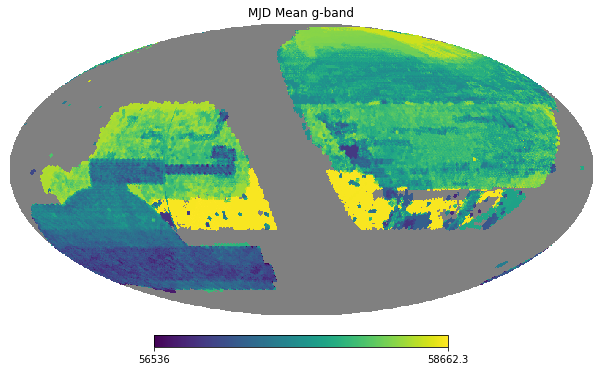

In [10]:
hp.mollview(df['mjd_mean_g'], rot=-85, title='MJD Mean g-band')